# 4 Assignment - Part 2

### Import libraries

In [58]:
import numpy as np
import pandas as pd
from io import StringIO

from src.SOM_algorithm import SOM
import matplotlib.pyplot as plt
import seaborn as sns

img_path = 'img_2/'

sns.set_style("whitegrid")

## 4.1 Topological Ordering of Animal Species

The SOM algorithm can be used to assign a natural order to objects characterized only by a large number of attributes. This is done by letting the SOM
algorithm create a topological mapping from the high-dimensional attribute
space to a one-dimensional output space.

As sample data, please use a simple database of 32 animal species where
each animal is characterized by 84 binary attributes. The data is in the le
animals.dat. This file defines the 32×84 matrix props where each row contains
the attributes of one animal. The data are organised in row-by-row manner. There is also a file animalnames.dat with the names of the animals in the same
order. This vector should only be used to print out the final ordering in a more
readable format. These 84 values serve as input and 100 nodes arranged in a
one-dimensional topology, i.e. in a linear sequence, constitute the output.

Train the SOM network by showing the attribute vector of one animal at a
time. The SOM algorithm should now be able to create a mapping onto the 100
output nodes such that similar animals tend to be close while different animals
tend to be further away along the sequence of nodes. In order to get this one-dimensional topology, the network has to be trained using a one-dimensional
neighbourhood.

In particular, your task is to write the core algorithm. Use a weight matrix
of size 100 × 84 initialized with random numbers between zero and one. Use an outer loop to train the network for about 20 epochs, and an inner loop which
loops through the 32 animals, one at a time. For each animal you will have to
pick out the corresponding row from the props matrix. Then find the row of the
weight matrix with the shortest distance to this attribute vector (p). Note that
you cannot use a scalar product since the attribute vectors are not normalized.
Therefore you have to take the difference between the two vectors and calculate
the length of this difference vector. Once you have the index to the winning
node, it is time to update the weights. Update the weights so that they come a
bit closer to the input pattern. A suitable step size is 0.2. Note that only weights
to the winning node and its neighbours should be updated. The neighbours are
in this case the nodes with an index close to that of the winning one. You
should start with a large neighbourhood and gradually make it smaller. Make
the size of the neighbourhood depend on the epoch loop variable so that you
start with a neighbourhood of about 50 and end up close to one or zero.Finally,
you have to print out the result, i.e. the animals in a natural order. Do this
by looping through all animals once more, again calculating the index of the
winning output node. Save these indices in a 32 element vector pos. By sorting
this vector we will get the animals in the desired order. Check the resulting
order. Does it make sense? If everything works, animals next to each other
in the listing should always have some similarity between them. Insects should
typically be grouped together, separate from the different cats, for example.

### Load data

In [59]:
X = np.loadtxt('./data/animals.dat', delimiter=',').reshape((32, 84))
names = np.genfromtxt('./data/animalnames.txt', dtype='str')
names = [n.replace("'", "") for n in names]

### Clustering

In [60]:
som = SOM(learning_rate=0.2, n_nodes=100, neighborhood_size=50, grid_shape=None, cyclic=False, max_iterations=20)
som.fit(X)
sorted_animals = som.transform(X, names)

## 4.2 Cyclic Tour

In the previous example, the SOM algorithm in effect positioned a one-dimensional
curve in the 84-dimensional input space so that it passed close to the places
where the training examples were located. Now the same technique can be used
to layout a curve in a two-dimensional plane so that it passes a set of points.

In fact, this can be interpreted as a variant of the travelling salesman problem.
The training points correspond to the cities and the curve corresponds to the
tour. SOM algorithm should be able to find a fairly short route which passes
all cities.

The actual algorithm is very similar to what you implemented in the previons
task. In fact, you might be able to reuse much of the code. The main differences
are:

- The input space has two dimensions instead of 84. The output grid should have 10 nodes, corresponding to the ten cities used in this example.
- The neighbourhood should be circular since we are looking for a circular tour. When calculating the neighbours you have to make sure that the first and the last output node are treated as next neighbours.
- The size of the neighbourhood must be smaller, corresponding to the smaller number of output nodes. It is reasonable to start with a neighbourhood size of 2 and then change it to 1 and finally zero.
- When presenting the result, it is better to plot the suggested tour graphically than to sort the cities.

The location of the ten cities is defined in the file cities.dat which defines
the 10 × 2 matrix city. Each row contains the coordinates of one city (value
between zero and one).

Please plot both the tour and the training points. Give your interpretation

### Load data

In [126]:
X = np.genfromtxt('./data/cities.dat', delimiter=',', skip_header=3, dtype="str")
X = np.array([float(x.replace(";", "")) for x in X.flatten()]).reshape((10, 2))

### Clustering

In [127]:
som = SOM(learning_rate=0.2, n_nodes=10, neighborhood_size=2, grid_shape=None, cyclic=True, max_iterations=20)
som.fit(X)
order = som.transform(X, X)

In [128]:
order = np.vstack([order, order[0]])

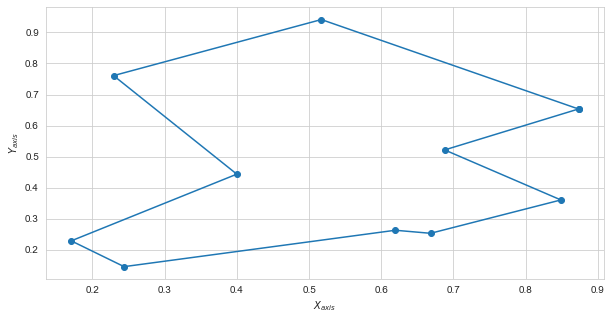

In [130]:
plt.figure(figsize=(10, 5))
plt.scatter(order[:, 0].flatten(), order[:, 1].flatten())
plt.plot(order[:, 0].flatten(), order[:, 1].flatten())

plt.xlabel("$X_{axis}$")
plt.ylabel("$Y_{axis}$")

plt.show()

## 4.3 Data Clustering: Votes of MPs

The file votes.dat contains data about how all 349 members of the Swedish
parliament did vote in the 31 first votes during 2004-2005. There are also three
additional files mpparty.dat, mpsex.dat and mpdistrict.dat with information
about the party, gender and district of each member of parliament (MP). Finally,
there is a file mpnames.txt with the names of the MPs. Your task is to use the
SOM algorithm to position all MPs on a 10 × 10 grid according to their votes.

By looking at where the different parties end up in the map you should be
able to see if votes of the MPs actually reflect the traditional left-right scale,
and if there is a second dimension as well. You should be able to see which
parties are far apart and which are close.

By looking at the distribution of female and male MPs you could get some
insight into whether MPs tend to vote differently depending on their gender.
You can also see if there is a tendency for MPs from different districts to vote
systematically different.

The file votes.dat defines a 349 × 31 matrix votes. Data are organised in
row-by-row manner. Each one of 349 rows corresponds to a specific MP and each
one of 31 columns to a specific vote. The elements are zero for a no-vote and
one for a yes-vote. Missing votes (abstrained or non-present) are represented
as 0.5.

You should use the SOM algorithm to find a topological mapping from the
31-dimensional input space to a 10 × 10 output grid. The network should be
trained with each MPs votes as training data. If all works well, voting patterns
that are similar will end up close to each other in the 10 × 10 map.
Please display the results with respect to different attributes (i.e. party,
gender, district) and describe the results, provide your interpretation.


### Load data

In [72]:
X = np.loadtxt('./data/votes.dat', delimiter=',').reshape((349, 31))
names = np.genfromtxt('./data/mpnames.txt', delimiter=",", dtype='str')

In [108]:
sex = np.loadtxt('./data/mpsex.dat', delimiter=',', skiprows=2, dtype='int')
district = np.loadtxt('./data/mpdistrict.dat', delimiter=',', dtype='int')
party = np.loadtxt('./data/mpparty.dat', delimiter=',', skiprows=3, dtype='int')

In [109]:
sex = np.where(sex == 0, "Male", "Female");
party_name = {
  0: "no party",
  1: 'm',
  2: 'fp',
  3: 's',
  4: 'v',
  5: 'mp',
  6: 'kd',
  7: 'c'
}
party = np.array([party_name[p] for p in party]);

### Clustering

In [110]:
som = SOM(learning_rate=0.2, n_nodes=100, neighborhood_size=5, grid_shape=(10, 10), cyclic=False, max_iterations=20)
som.fit(X)
order = som.transform(X)

In [111]:
pos = np.array([np.unravel_index(o, (10, 10)) for o in order])

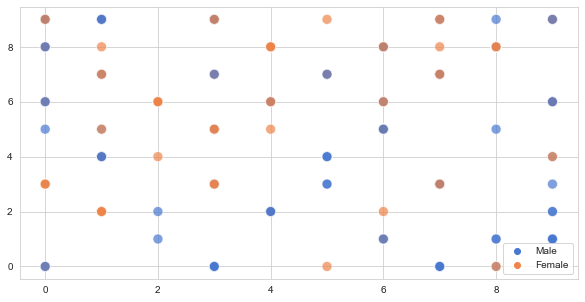

In [112]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=pos[:, 0].flatten(), y=pos[:, 1].flatten(), hue=sex, alpha=0.7, s=100, palette='muted');

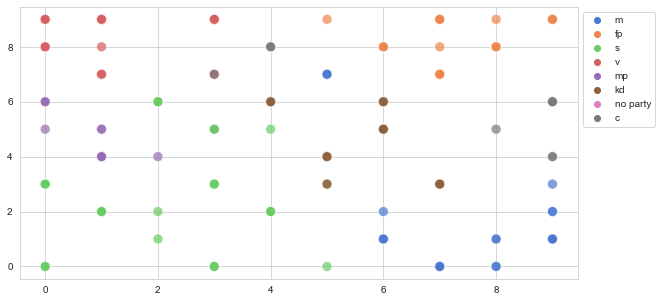

In [121]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=pos[:, 0].flatten(), y=pos[:, 1].flatten(), hue=party, alpha=0.7, s=100, palette='muted')
plt.legend(bbox_to_anchor=(1, 1));

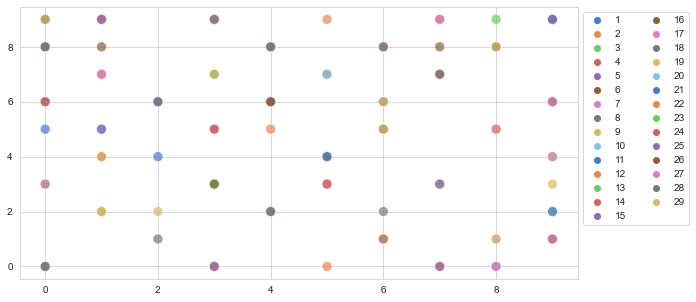

In [123]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=pos[:, 0].flatten(), y=pos[:, 1].flatten(), hue=district, alpha=0.7, s=100, palette='muted')
plt.legend(bbox_to_anchor=(1, 1), ncol=2);